# Basics

_Jenny Kim, Phil Marshall_

In this notebook we demonstrate some of the basic functionality of the `SLRealizer` class, including:

* Reading in an `OM10` mock lens catalog and selecting a subsample of lenses to work on.

* Reading in an observation history, and setting up a list of `LensSystem` objects.

* Visualizing the `SLRealizer` model for a given lens system, showing the positions, sizes and brightnesses of lens galaxy and lensed quasars, at each epoch. 

### Requirements

You will need to have the `om10` package installed:
```
pip install om10
```

## Reading in the Lens Catalog and Observation History

The OM10 input catalog is provided as part of the OM10 package. The SLRealizer package provides an example observation history file in `csv` format, extracted from the `minion_1016` OpSim run output. 

In [19]:
import om10
import desc.slrealizer

It's always a good idea to make the sample of lenses you are interested in first, and then just work with that sample. Let's make a LSST-like sample, and compute the colors of the lens and source components.
<!-- If you do not have `qso_mock.fits` file, you can download it here : [OM10 Repository](https://github.com/drphilmarshall/OM10/tree/master/data).-->

In [20]:
db = om10.DB()
db.select_random(maglim=23.3,area=18000.0,IQ=0.75)
db.paint(synthetic=True)
realizer = desc.slrealizer.SLRealizer(catalog=db, observation="../../data/twinkles_observation_history.csv")

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: selection yields 2813 lenses


## Visualizing a `LensSystem`

We will pick a lens from the OM10 sample, and plot a cartoon representation of it at a random epoch. We can do this by first picking a lens manually and then passing that lens' ID to the `plot_random_lens_date` in the realizer class, just as the code below. This notebook does this for five times.

Populating the interactive namespace from numpy and matplotlib
Number of lenses with image separation > 1.0 arcsec =  1901
Number of these with 4 images =  267
Number of these with i3 < 22 =  125
OM10: Extracted OM10 lens number 11467923:
 LENSID  FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
-------- -------- ---- ----- ... ------------- ------------- -------------
11467923        0    4 0.668 ...         23.79  23.617203085 24.1402510866
0
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 7.99098543531e-05
Quasar Position X, Y -0.274279908 -0.545413744
1
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 2.07706114508e-11
Quasar Position X, Y 0.511420092 -0.294213744
2
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 8.61097196045e-11
Quasar Position X, Y -0.460479908 0.318086256
3
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 0.000174391713339
Quasar Positi

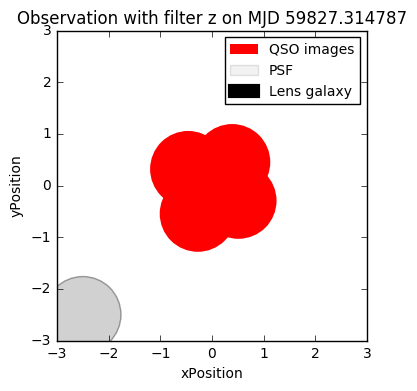

In [21]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

# Choose a good lens system, with large imsep and 4 images:
                      
wide = db.sample[np.where(db.sample['IMSEP'] > 1.0)]
print "Number of lenses with image separation > 1.0 arcsec = ",len(wide)

wide_quads = wide[np.where(wide['NIMG'] == 4)]
print "Number of these with 4 images = ",len(wide_quads)

bright_wide_quads = wide[np.where(wide_quads['MAGI'] < 22)]
print "Number of these with i3 < 22 = ",len(bright_wide_quads)

db.sample = bright_wide_quads    
                      
k = db.sample[0]['LENSID']

realizer.plot_lens_random_date(lensID=k)

OM10: Extracted OM10 lens number 11467923:
 LENSID  FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
-------- -------- ---- ----- ... ------------- ------------- -------------
11467923        0    4 0.668 ...         23.79  23.617203085 24.1402510866
0
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 2.01957494944e-06
Quasar Position X, Y -0.274279908 -0.545413744
1
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 5.24939094309e-13
Quasar Position X, Y 0.511420092 -0.294213744
2
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 2.1762651681e-12
Quasar Position X, Y -0.460479908 0.318086256
3
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 4.40743057912e-06
Quasar Position X, Y 0.390020092 0.451686256


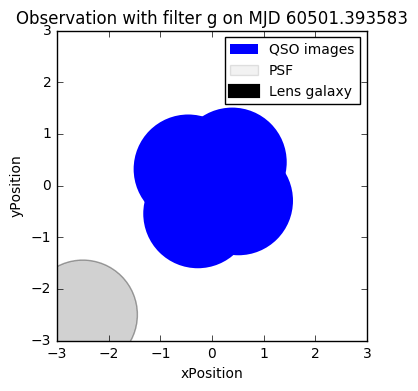

In [22]:
realizer.plot_lens_random_date(lensID=k)

OM10: Extracted OM10 lens number 11467923:
 LENSID  FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
-------- -------- ---- ----- ... ------------- ------------- -------------
11467923        0    4 0.668 ...         23.79  23.617203085 24.1402510866
0
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 4.51909957844e-05
Quasar Position X, Y -0.274279908 -0.545413744
1
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 1.17462936469e-11
Quasar Position X, Y 0.511420092 -0.294213744
2
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 4.86971726721e-11
Quasar Position X, Y -0.460479908 0.318086256
3
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 9.86228200027e-05
Quasar Position X, Y 0.390020092 0.451686256


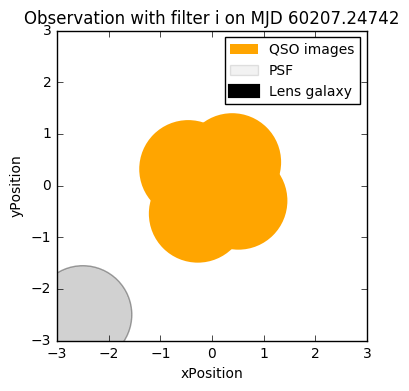

In [23]:
realizer.plot_lens_random_date(lensID=k)

OM10: Extracted OM10 lens number 11467923:
 LENSID  FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
-------- -------- ---- ----- ... ------------- ------------- -------------
11467923        0    4 0.668 ...         23.79  23.617203085 24.1402510866
0
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 1.17760009276e-05
Quasar Position X, Y -0.274279908 -0.545413744
1
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 3.06088331273e-12
Quasar Position X, Y 0.511420092 -0.294213744
2
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 1.26896506839e-11
Quasar Position X, Y -0.460479908 0.318086256
3
[ 8.4867 -8.0614 -6.5094  9.3384]
NIMG
----
   4
Quasar Alpha, Lens Alpha
1 2.56994208621e-05
Quasar Position X, Y 0.390020092 0.451686256


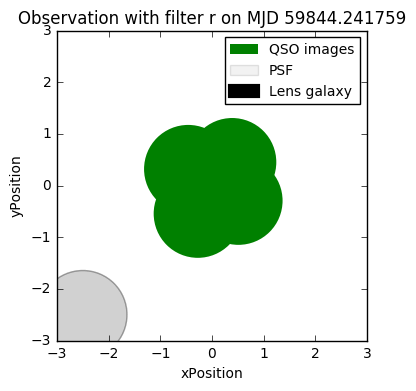

In [24]:
realizer.plot_lens_random_date(lensID=k)